In [1]:
# Imports
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import mercury as mr
from wordcloud import WordCloud

from dateutil.parser import parse
from string import punctuation as punct
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("df-job-al.zip")
df = df.drop(columns=["Unnamed: 0", "index"])

# Format lists
remove_punct = lambda x: x.translate(str.maketrans('', '', punct)).split()
df.extensions = df.extensions.apply(remove_punct)
df.description_tokens = df.description_tokens.apply(remove_punct)

In [3]:
# Data cleaning

In [4]:
#keywords
junior_keywords = {'junior', 'entry level', 'intern', 'apprentice','jr','I'}
mid_keywords = {'mid-level', 'mid level', 'midlevel','mid', 'II','consultant', 'intermediate', 'experienced','associate','practitioner'}
senior_keywords = {'senior', 'lead', 'principal', 'sr', 'III', 'IV', 'senior level','advanced','senior associate', 'expert'}

In [5]:
# function to assign an offer to a category
def categorize_job(row):
    title = row['title'].lower()
    description = row['description'].lower()
    for keyword in junior_keywords:
        if keyword in title or keyword in description:
            return 'Junior'
    for keyword in mid_keywords:
        if keyword in title or keyword in description:
            return 'Mid'
    for keyword in senior_keywords:
        if keyword in title or keyword in description:
            return 'Senior'
    return 'unknown'

# add column 
df['experience'] = df.apply(categorize_job, axis=1)

In [6]:
df = df.drop(df[df['experience'] == 'unknown'].index)

In [7]:
lvl = mr.MultiSelect(value=['Junior','Mid','Senior'],choices=['Junior','Mid','Senior'], label="Choose your level")

mercury.MultiSelect

In [8]:
df_lvl = df[df['experience'].isin(lvl.value)]

In [9]:
# Counting skills appearing in the description and title
skills = []
for val in df_lvl.description_tokens.values:
    skills.extend(val)
skills, counts = np.unique(skills, return_counts=True)

# Create DataFrame with skills and number_of_postings columns
skills_df = pd.DataFrame({"skill": list(skills), "number_of_postings": counts})

# Select rows with number_of_postings >= 10
skills_df = skills_df[skills_df['number_of_postings'] >= 10]

# Sort by number_of_postings in descending order
skills_df = skills_df.sort_values(by=["number_of_postings"], ascending=False)

In [10]:
app = mr.App(continuous_update=False)

mercury.App

In [37]:
sk_set = mr.MultiSelect( value=['sql','tableau', 'python', 'r', 'snowflake','excel','powerbi','sas','html','go'],
                        choices=skills_df['skill'], label="Choose your skills"
                       )

mercury.MultiSelect

In [38]:
sk_df = skills_df[skills_df.skill.isin(sk_set.value)]

# Dashboard for 15,963 Data Analyst job listings in Python 📊

Nowadays, it is becoming increasingly difficult to find a first job as a data analyst. Therefore, we have prepared an analysis of the most useful skills to help you land your dream job. Here, you will find information on: 

## What you will find here:

1. <a href="#1.">Number of jobs depending on experience level</a>
2. <a href="#2.">What company is looking for the most employees</a>
3. <a href="#3.">Where you can find the most offers in internet</a>
4. <a href="#4.">Contract type</a>
5. <a href="#5.">How many offers have remote work</a>
6. <a href="#6.">About data</a>
7. <a href="#7.">Word Cloud for Skills</a>
8. <a href="#8.">Most needed skills</a>

##### ATTENTION: If you're unchecking, all values from the MultiSelect widget charts will not show.

In [39]:
if len(df_lvl) == 0:
    mr.Md('Choose at least one level.')
    mr.Stop()

In [40]:
if len(sk_df) == 0:
    mr.Md("Choose at least one skill.")
    mr.Stop()

## 1.

# Number of jobs for Junior, Mid, Senior

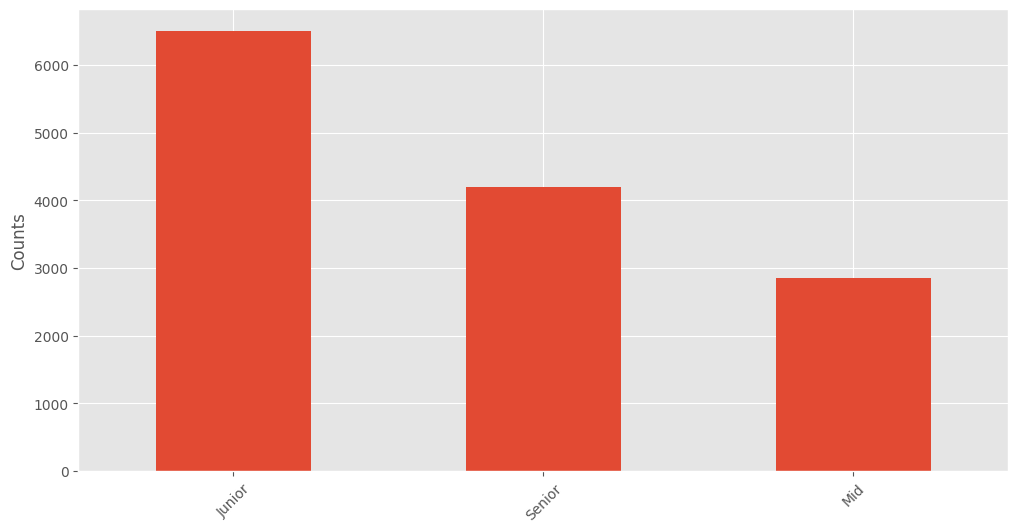

In [41]:
plt.figure(figsize=(12,6))
plt.style.use('ggplot')

level = df_lvl['experience'].value_counts()
level.plot(kind='bar')

plt.title(mr.Md(f"# Number of jobs for {', '.join(lvl.value)}"))
plt.ylabel("Counts")
plt.xticks(rotation=45)
plt.show()

[<a href='#Dashboard-for-15,963-Data-Analyst-job-listings-in-Python-📊'>Back to top</a>]

## 2.

# What company is looking for Junior, Mid, Senior employees

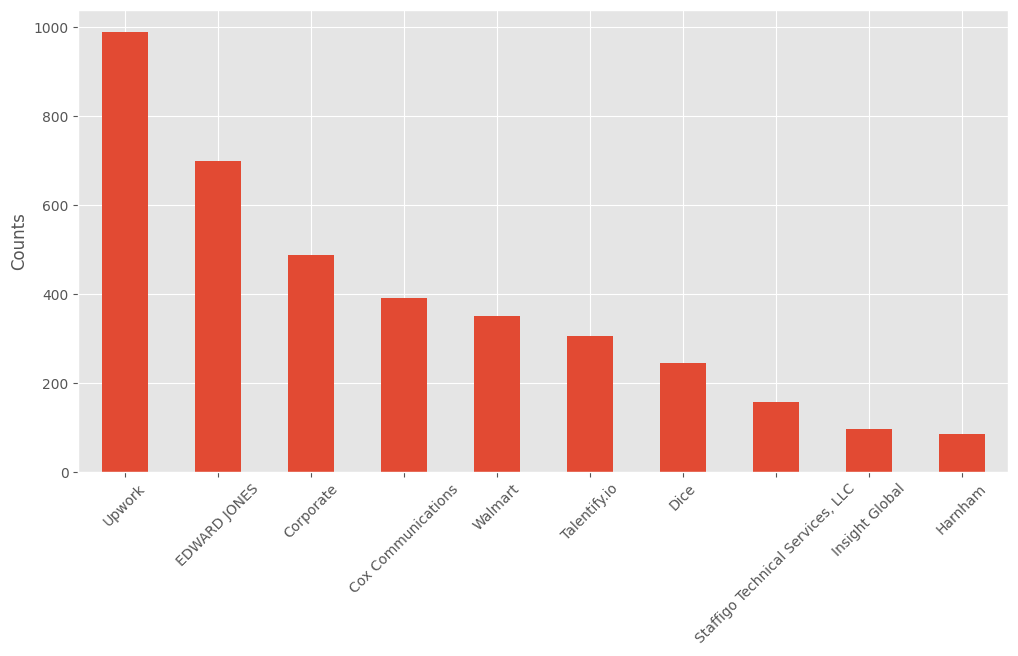

In [42]:
plt.figure(figsize=(12,6))
counts = df['company_name'].value_counts().nlargest(10).sort_values(ascending=False)
counts.plot(kind='bar')

plt.title(mr.Md(f"# What company is looking for {', '.join(lvl.value)} employees"))
plt.ylabel("Counts")
plt.xticks(rotation=45)
plt.show()

[<a href='#Dashboard-for-15,963-Data-Analyst-job-listings-in-Python-📊'>Back to top</a>]

## 3.

# Where you can find the most offers for Junior, Mid, Senior

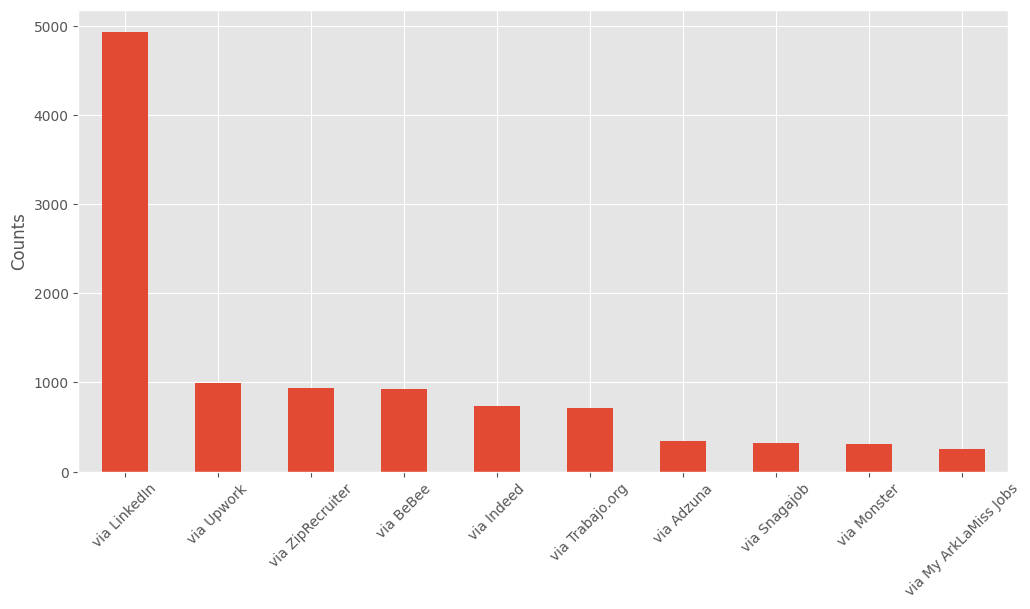

In [43]:
plt.figure(figsize=(12,6))
counts = df['via'].value_counts().nlargest(10).sort_values(ascending=False)
counts.plot(kind='bar')

plt.title(mr.Md(f"# Where you can find the most offers for {', '.join(lvl.value)}"))
plt.ylabel("Counts")
plt.xticks(rotation=45)
plt.show()

[<a href='#Dashboard-for-15,963-Data-Analyst-job-listings-in-Python-📊'>Back to top</a>]

## 4.

# Contract type for  Junior, Mid, Senior

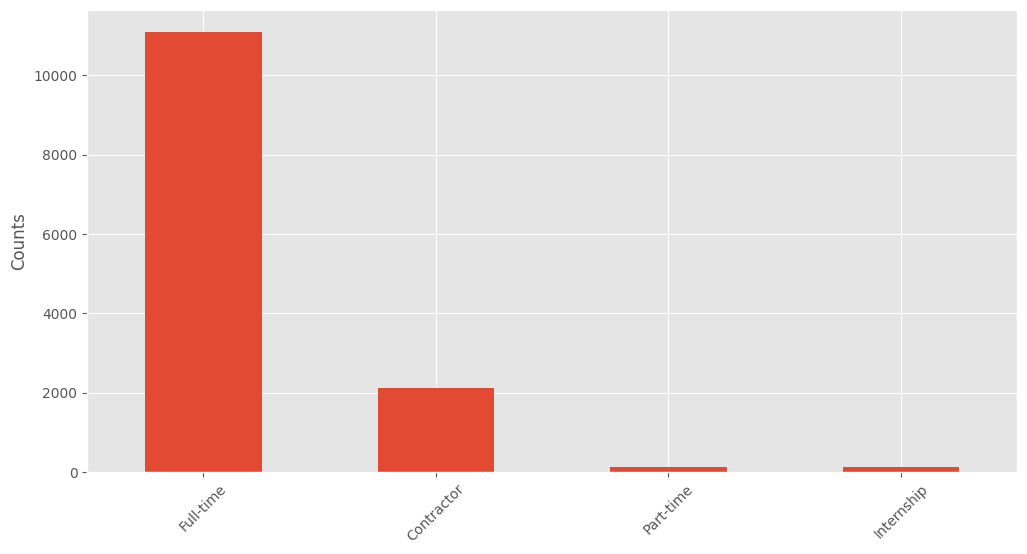

In [44]:
plt.figure(figsize=(12,6))
counts = df['schedule_type'].value_counts().sort_values(ascending=False)
counts.plot(kind='bar')

plt.title(mr.Md(f"# Contract type for  {', '.join(lvl.value)}"))
plt.ylabel("Counts")
plt.xticks(rotation=45)
plt.show()

[<a href='#Dashboard-for-15,963-Data-Analyst-job-listings-in-Python-📊'>Back to top</a>]

## 5.

In [45]:
# Create dummy variables from the 'work_from_home' column
dummies = pd.get_dummies(df['work_from_home'], prefix='remote', prefix_sep='_')

# How many offers have remote work option for  Junior, Mid, Senior

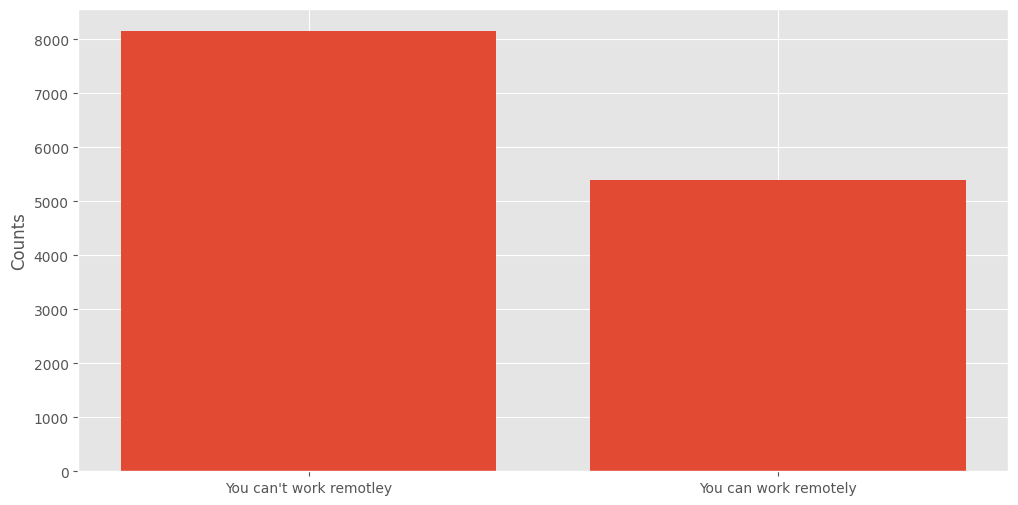

In [46]:
plt.figure(figsize=(12,6))
counts = dummies.value_counts()
yn = ["You can't work remotley", 'You can work remotely']
plt.bar(yn, counts)

plt.title(mr.Md(f"# How many offers have remote work option for  {', '.join(lvl.value)}"))
plt.ylabel("Counts")
plt.show()

[<a href='#Dashboard-for-15,963-Data-Analyst-job-listings-in-Python-📊'>Back to top</a>]

In [47]:
top_3_web = df_lvl['via'].value_counts().nlargest(3).index.tolist()

In [48]:
top_contract = df_lvl['schedule_type'].value_counts().nlargest(1).index.tolist()

In [49]:
top_3_companies = df_lvl['company_name'].value_counts().nlargest(3).index.tolist()

In [50]:
remote_jobs_percent = round((df_lvl['work_from_home'].sum() / len(df_lvl)) * 100, 1)

## 6.

In [51]:
mr.Md(f"# About data for {', '.join(lvl.value)}") 
mr.Md(f"### This dataset is about the USA market. ")
mr.Md(f"### Percentage of job offers with remote work: {remote_jobs_percent}% ")
mr.Md(f"### What kind of contract is the most: {' '.join(top_contract)}")
mr.Md(f"### You you can find the most offers from this three company: {', '.join(top_3_companies)}")
mr.Md(f"### You can find the most offers in: {', '.join(top_3_web)}")
mr.Md(f"### There are exactly 15,963 job advertisements from the Internet in this dataset. ")

# About data for Junior, Mid, Senior

### This dataset is about the USA market. 

### Percentage of job offers with remote work: 39.8% 

### What kind of contract is the most: Full-time

### You you can find the most offers from this three company: Upwork, EDWARD JONES, Corporate

### You can find the most offers in: via LinkedIn, via Upwork, via ZipRecruiter

### There are exactly 15,963 job advertisements from the Internet in this dataset. 

[<a href='#Dashboard-for-15,963-Data-Analyst-job-listings-in-Python-📊'>Back to top</a>]

## 7.

In [52]:
# create a dictionary from the sorted_counts variable
word_dict = sk_df.set_index('skill')['number_of_postings'].to_dict()

In [53]:
# generate the word cloud
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate_from_frequencies(word_dict)

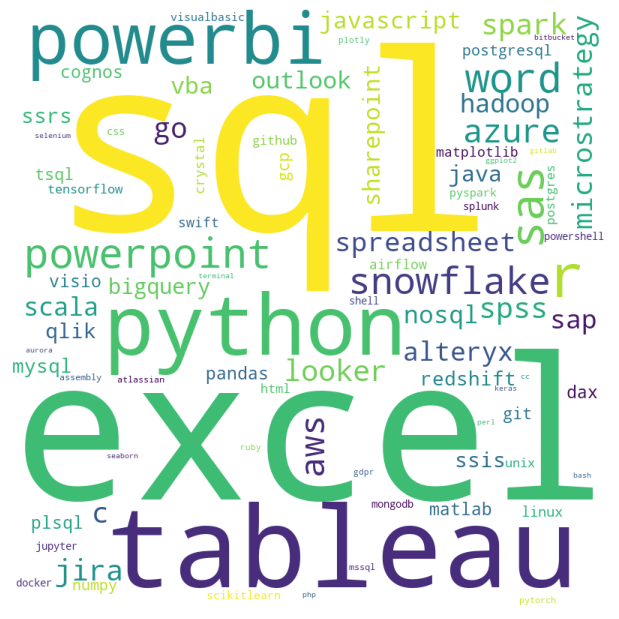

In [54]:
# Display the word cloud
plt.figure(figsize = (12, 6), facecolor = None) 
plt.imshow(wordcloud) 

plt.axis("off") 
plt.tight_layout(pad = 0) 
#plt.title('Word cloud for data analyst skills')

plt.show()

[<a href='#Dashboard-for-15,963-Data-Analyst-job-listings-in-Python-📊'>Back to top</a>]

## 8.

In [55]:
# extract the 10 most common keywords
#top_skills_df = skills_df[:10]

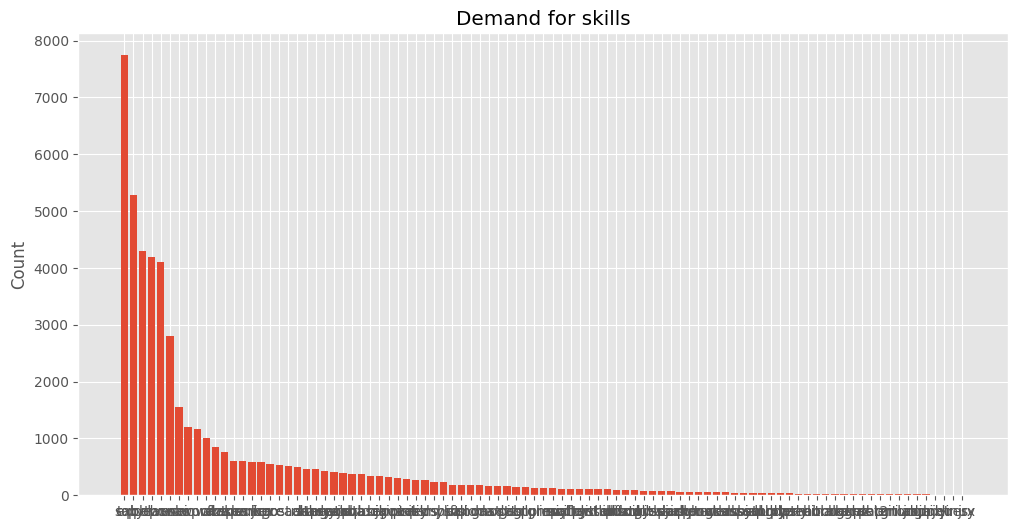

In [56]:
plt.figure(figsize=(12,6))
plt.bar(sk_df['skill'], sk_df['number_of_postings'])

plt.title('Demand for skills')
plt.ylabel('Count')
plt.show()

[<a href='#Dashboard-for-15,963-Data-Analyst-job-listings-in-Python-📊'>Back to top</a>]